In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sparsetools as sp

In [2]:
rf_syn = sp.profile('band_6_RF_syn.nc')

profile::setsize: nx=3, ny=61, nw=94, ns=4, nt=1
profile::read: [profiles][wav]


In [43]:
ref = np.median(rf_syn.dat[0,:,:,:,0],0)
rf = (rf_syn.dat[0,:,:,:,0] - ref) / (100. * ref)
rf /= np.max(np.abs(rf))

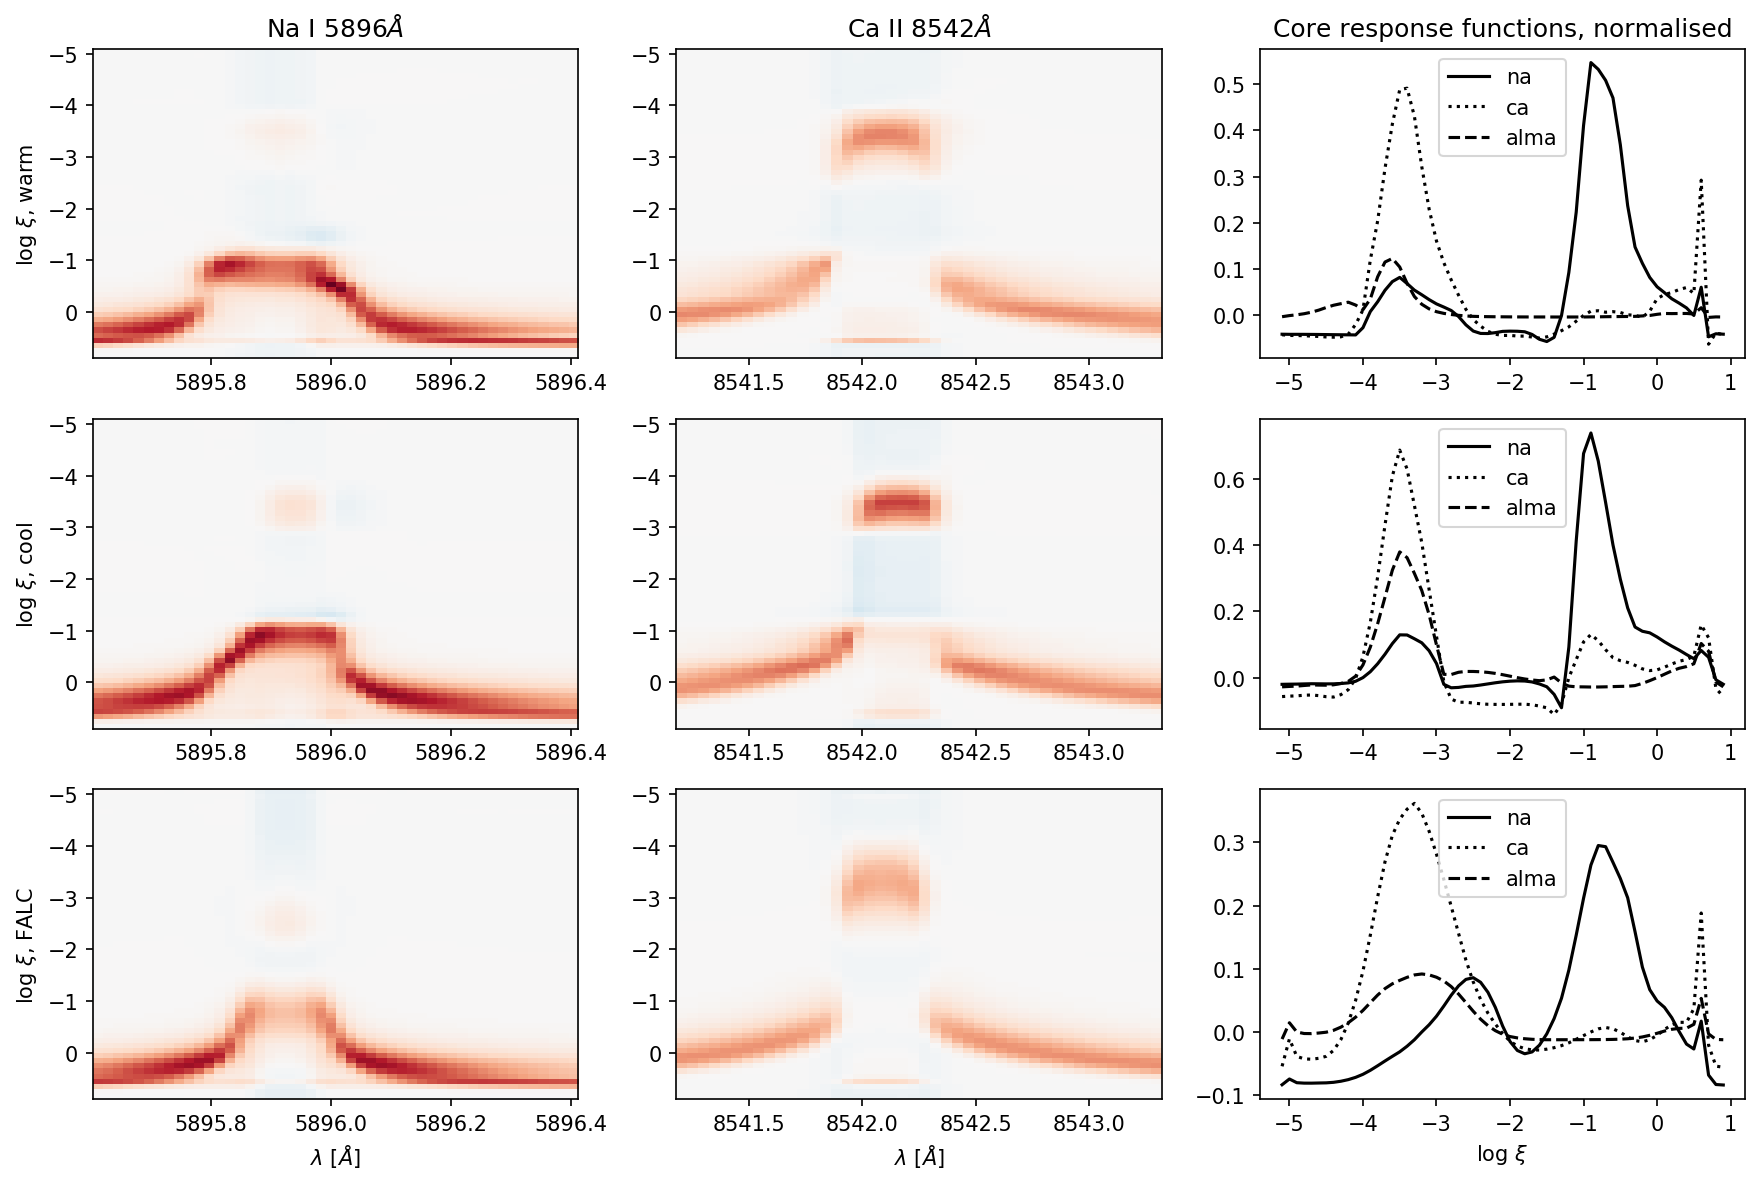

In [84]:
plt.rcParams['figure.dpi'] = 150
fig,ax = plt.subplots(3,3,figsize=(12,8))
wn0 = rf_syn.wav[0]
wn1 = rf_syn.wav[47]
wc0 = rf_syn.wav[49]
wc1 = rf_syn.wav[-2]
ax[0,0].imshow(rf[:,0,:48],aspect='auto',extent=[wn0,wn1,0.9,-5.1],cmap='RdBu_r',vmin=-1,vmax=1)
ax[1,0].imshow(rf[:,1,:48],aspect='auto',extent=[wn0,wn1,0.9,-5.1],cmap='RdBu_r',vmin=-1,vmax=1)
ax[2,0].imshow(rf[:,2,:48],aspect='auto',extent=[wn0,wn1,0.9,-5.1],cmap='RdBu_r',vmin=-1,vmax=1)
ax[0,1].imshow(rf[:,0,49:-1],aspect='auto',extent=[wc0,wc1,0.9,-5.1],cmap='RdBu_r',vmin=-1,vmax=1)
ax[1,1].imshow(rf[:,1,49:-1],aspect='auto',extent=[wc0,wc1,0.9,-5.1],cmap='RdBu_r',vmin=-1,vmax=1)
ax[2,1].imshow(rf[:,2,49:-1],aspect='auto',extent=[wc0,wc1,0.9,-5.1],cmap='RdBu_r',vmin=-1,vmax=1)
ax[0,2].plot(np.arange(61)*0.1-5.1,rf[:,0,18],'-k',label='na')
ax[1,2].plot(np.arange(61)*0.1-5.1,rf[:,1,18],'-k',label='na')
ax[2,2].plot(np.arange(61)*0.1-5.1,rf[:,2,18],'-k',label='na')
ax[0,2].plot(np.arange(61)*0.1-5.1,rf[:,0,68],':k',label='ca')
ax[1,2].plot(np.arange(61)*0.1-5.1,rf[:,1,68],':k',label='ca')
ax[2,2].plot(np.arange(61)*0.1-5.1,rf[:,2,68],':k',label='ca')
ax[0,2].plot(np.arange(61)*0.1-5.1,rf[:,0,-1],'--k',label='alma')
ax[1,2].plot(np.arange(61)*0.1-5.1,rf[:,1,-1],'--k',label='alma')
ax[2,2].plot(np.arange(61)*0.1-5.1,rf[:,2,-1],'--k',label='alma')
ax[0,0].set_ylabel(r'$\log\ \xi$, warm')
ax[1,0].set_ylabel(r'$\log\ \xi$, cool')
ax[2,0].set_ylabel(r'$\log\ \xi$, FALC')
ax[2,0].set_xlabel(r'$\lambda$ [$\AA$]')
ax[2,1].set_xlabel(r'$\lambda$ [$\AA$]')
ax[2,2].set_xlabel(r'$\log\ \xi$')
ax[0,0].set_title(r'Na I 5896$\AA$')
ax[0,1].set_title(r'Ca II 8542$\AA$')
ax[0,2].set_title(r'Core response functions, normalised')
ax[0,2].legend()
ax[1,2].legend()
ax[2,2].legend()
plt.tight_layout()